## 4.33 月最大消费金额(monthCardLargeAmt)盒图绘制

我们通过绘制盒图的方式，查看月最大消费金额的数据大致分布。

## 实训任务

- 调用Seaborn库中的boxplot()函数绘制盒图，查看月最大消费金额数据分布。
- boxplot()函数的参数orient为"v"，表示竖向展示。
- 已给图形的尺寸参数figsize为(8,6)。
- 图形的其他参数保持默认值。


可以看到月最大消费金额中有部分值特别大，大约大于2.0e+06 （200万），远高于其他客户取现金额，我们需要查看一下这些客户的具体数据。

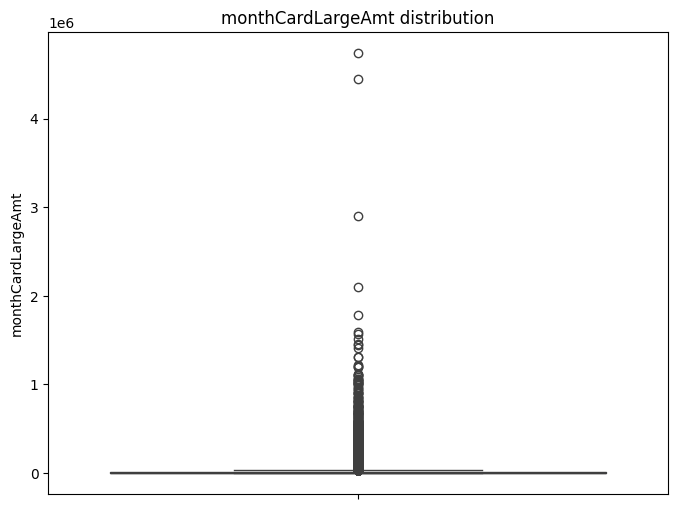

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ')
fig,ax = plt.subplots(figsize=(8,6))
# 绘制盒图，查看月最大消费金额数据分布
sns.boxplot(y='monthCardLargeAmt', data=data, orient='v', ax=ax)

plt.title('monthCardLargeAmt distribution')
plt.show()

## 4.34 月最大消费金额(monthCardLargeAmt) 异常值处理

我们通过绘制盒图，检测到了月最大消费金额中有部分值特别大，大于2.0e+06（200万）。

下面我们对这个异常值进行查看与处理：


## 实训任务

请筛选出月最大消费金额大于2.0e+06的数据，赋予变量monthCard，类型为DataFrame。

可以看到这两个客户月最大消费金额分别为210万和290万，总消费金额分别为1044万和706万。此外，综合考量客户其他消费情况为：如网上消费金额、网上消费笔数、月最大消费金额，客户存在这种情况也是有可能的，于是我们同样将其保留。

In [2]:
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ')
# 筛选出月最大消费金额大于200万的数据
monthCard = data[data['monthCardLargeAmt'] > 2000000]
print(monthCard)

      CityId  Han   age  card_age  cashAmt_mean  cashAmt_non_null_months  \
6290    一线城市    0  37.0        78   2300.000000                        2   
6712    一线城市    0  33.0        14      0.000000                        0   
15660   二线城市    0  34.0        64    658.361865                        1   
33446   一线城市    0  37.0        74   2109.884086                        2   

       cashCnt_mean  cashCnt_non_null_months  cashTotalAmt  cashTotalCnt  ...  \
6290       1.500000                        2          4600             3  ...   
6712       0.000000                        0             0             0  ...   
15660      0.429366                        1          1317             1  ...   
33446      1.376011                        2          4220             3  ...   

      publicPayCnt sex  threeVerify  transAmt_mean  transAmt_non_null_months  \
6290      0.000000   男           一致   2.122952e+06                        12   
6712      0.000000   男          NaN   1.009316e+06   

## 4.35 总消费笔数(transTotalCnt)盒图绘制

我们通过绘制盒图的方式，查看总消费笔数的数据大致分布。

## 实训任务

- 调用Seaborn库中的boxplot()函数绘制盒图，查看总消费笔数数据分布。
- boxplot()函数的参数orient为"v"，表示竖向展示。
- 已给图形的尺寸参数figsize为(8,6)。
- 图形的其他参数保持默认值。


可以看到总消费笔数中有一部分值相对较大，大于6000，远高于其他客户消费笔数，我们查看一下这些客户的具体数据。

Text(0.5, 1.0, 'transTotalCnt distribution')

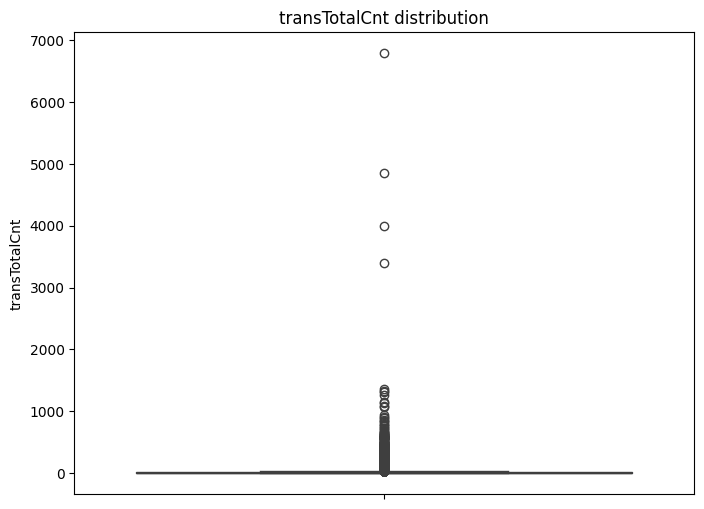

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ')
fig,ax = plt.subplots(figsize=(8,6))
# 绘制盒图，查看总消费笔数数据分布
sns.boxplot(y='transTotalCnt', data=data, orient='v', ax=ax)
plt.title('transTotalCnt distribution')

## 4.36 总消费笔数异常值处理 

我们通过绘制盒图，检测到了总消费笔数中有一部分值相对较大，大于6000，远高于其他客户消费笔数。

打印出这部分客户的数据，可以看到消费笔数大于6000的实际上只有一位客户，其网上消费金额与笔数的数目为：


![](https://ai-studio-static-online.cdn.bcebos.com/64871019830f4dd3a71c47fdb288dabc38d516e1763749a2bbc8a45ab669d63e)


数据显示此客户总消费笔数为6789笔，同时其总消费金额为10万左右，月最大消费金额为4万左右，那么普通消费平均每笔消费10元左右。

而此客户总取现金额仅为500元，总取现笔数为4笔。 由此推测该客户可能是刷单账户，且由于此账户和其它个人客户数据差别较大，我们选择将其删除。


## 实训任务

请将总消费笔数在6000以上的此客户（这一行）删除,更新data。

In [4]:
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ')
# 从data中筛选总消费笔数小于6000的值，赋值给data
data = data[data['transTotalCnt'] < 6000]
print(data.head())

  CityId  Han   age  card_age  cashAmt_mean  cashAmt_non_null_months  \
0   一线城市    0  38.0         2           0.0                        0   
1   一线城市    0  39.0        19           0.0                        0   
2   二线城市    0  40.0        16           0.0                        0   
3     其它    0  38.0        13       22000.0                        1   
4   二线城市    0  24.0         8           0.0                        0   

   cashCnt_mean  cashCnt_non_null_months  cashTotalAmt  cashTotalCnt  ...  \
0           0.0                        0             0             0  ...   
1           0.0                        0             0             0  ...   
2           0.0                        0             0             0  ...   
3           6.0                        1         22000             6  ...   
4           0.0                        0             0             0  ...   

  publicPayCnt sex  threeVerify  transAmt_mean  transAmt_non_null_months  \
0          0.0   女          

## 4.37 数字编码

在前面的步骤中我们已经分别对离散型和连续型的特征进行了缺失值和异常值的处理。

但是客户样本中很多离散型特征的取值仍为中文，如婚姻状况列的取值为未婚、已婚、未知。在建立模型之前，我们需要对这些值进行数字编码，将中文类别映射为对应的数字。

如下图所示，将婚姻字段进行相应的数字编码：


![](https://ai-studio-static-online.cdn.bcebos.com/802e6a408788407fb9743fa104c2fede735ec1647ece48ab8d989a58d8afaaa0)

## 实训任务

- 请将maritalStatus列中的值进行映射：未知映射为0，未婚映射为1，已婚映射为2
- 请将education列中的值进行映射：未知映射为0，小学映射为1，初中映射为2，高中映射为3，本科以上映射为4
- 请将idVerify列中的值进行映射：未知映射为0，一致映射为1，不一致映射为2
- 请将threeVerify列中的值进行映射：未知映射为0，一致映射为1，不一致映射为2
- 请将netLength列中的值进行映射：无效映射为0，0-6个月映射为1，6-12个月映射为2，12-24个月映射为3，24个月以上映射为4
- 请将sex列中的值进行映射：未知映射为0，男映射为1，女映射为2
- 请将CityId列中的值进行映射：一线城市为1，二线城市为1，其它映射为3


现在我们可以看到，上述离散型的变量取值均完成了数字编码，变成了对应的阿拉伯数字。

In [6]:
import numpy as np
import pandas as pd
data = pd.read_table('dataset3.txt', sep='\t')

data["maritalStatus"] = data["maritalStatus"].map({"未知": 0, "未婚": 1, "已婚": 2})
data['education'] = data['education'].map({"未知": 0, "小学": 1, "初中": 2, "高中": 3, "本科以上": 4})
data['idVerify'] = data['idVerify'].map({"未知": 0, "一致": 1, "不一致": 2})
data['threeVerify'] = data['threeVerify'].map({"未知": 0, "一致": 1, "不一致": 2})
data["netLength"] = data["netLength"].map({"无效": 0, "0-6个月": 1, "6-12个月": 2, "12-24个月": 3, "24个月以上": 4})
data["sex"] = data["sex"].map({"未知": 0, "男": 1, "女": 2})
data["CityId"] = data["CityId"].map({"一线城市": 1, "二线城市": 1, "其它": 3})

print(data.head())

   CityId  Han   age  card_age  cashAmt_mean  cashAmt_non_null_months  \
0       1    0  38.0         2           0.0                        0   
1       1    0  39.0        19           0.0                        0   
2       1    0  40.0        16           0.0                        0   
3       3    0  38.0        13       22000.0                        1   
4       1    0  24.0         8           0.0                        0   

   cashCnt_mean  cashCnt_non_null_months  cashTotalAmt  cashTotalCnt  ...  \
0           0.0                        0             0             0  ...   
1           0.0                        0             0             0  ...   
2           0.0                        0             0             0  ...   
3           6.0                        1         22000             6  ...   
4           0.0                        0             0             0  ...   

   publicPayCnt  sex  threeVerify  transAmt_mean  transAmt_non_null_months  \
0           0.0    2

## 4.38 One-Hot编码 

在上一步我们对离散型的特征进行了数字编码，将中文类别映射为了相应的数字。

但数字编码给离散型特征的取值引入了原本不存在的次序关系，如已婚(映射数字2)是未婚(映射数字1)的两倍。

为了解决这个问题，我们采用One-Hot编码来消除这种次序关系。One-Hot编码将包含K个取值的离散型字段转换成K个取值为0或1的二元特征。

下图可以看出，One-Hot编码将婚姻状况maritalStatus转换为三个二元字段，分别为：未知（maritalStatus_0），未婚（maritalStatus_1），已婚（maritalStatus_2）。


![](https://ai-studio-static-online.cdn.bcebos.com/4847bb163d51456daa9e29762a5dd5b73b2a76f72f914030976786d7146b5efa)


Pandas中的get_dummies()函数为常用的One-Hot编码方法。

## 实训任务

- 请将婚姻状况、教育程度、身份验证、三要素验证、民族、在网时长、性别和城市级别按顺序进行One-Hot编码。
-要求：不保留原始字段，只保留One-Hot后的新字段，且One-Hot编码后的字段命名规则为maritalStatus_0，maritalStatus_1，maritalStatus_2......
可以看到，原始的列经过One-Hot编码转换成了对应新的列。


In [9]:
import numpy as np
import pandas as pd
data = pd.read_table('dataset5.txt', sep='\t')

# 进行One-Hot编码
data = pd.get_dummies(data, columns=['maritalStatus', 'education', 'idVerify', 'threeVerify', 'Han', 'netLength', 'sex', 'CityId'], prefix=['maritalStatus', 'education', 'idVerify', 'threeVerify', 'ethnicity', 'netLength', 'sex', 'CityId'])

print(data.columns)

Index(['age', 'card_age', 'cashAmt_mean', 'cashAmt_non_null_months',
       'cashCnt_mean', 'cashCnt_non_null_months', 'cashTotalAmt',
       'cashTotalCnt', 'inCourt', 'isBlackList', 'isCrime', 'isDue',
       'monthCardLargeAmt', 'noTransWeekPre', 'onlineTransAmt',
       'onlineTransCnt', 'publicPayAmt', 'publicPayCnt', 'transAmt_mean',
       'transAmt_non_null_months', 'transCnt_mean', 'transCnt_non_null_months',
       'transTotalAmt', 'transTotalCnt', 'Default', 'maritalStatus_0',
       'maritalStatus_1', 'maritalStatus_2', 'education_0', 'education_1',
       'education_2', 'education_3', 'education_4', 'idVerify_0', 'idVerify_1',
       'idVerify_2', 'threeVerify_0', 'threeVerify_1', 'threeVerify_2',
       'ethnicity_0', 'ethnicity_1', 'netLength_0', 'netLength_1',
       'netLength_2', 'netLength_3', 'netLength_4', 'sex_0', 'sex_1', 'sex_2',
       'CityId_1', 'CityId_2', 'CityId_3'],
      dtype='object')
